#### Import the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.simplefilter(action = "ignore", category = UserWarning)

#### Import and read loan dataset

In [5]:
loan = pd.read_csv("loan.csv", header=0)
loan.head()

/var/folders/0w/32j_tfgs54xcxw097yw37bq80000gq/T/ipykernel_20285/2575825528.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv", header=0)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
print(loan.columns)
print(loan.shape)
loan.info()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# There are 111 columns in the loan dataset and info result is not in detail
# Checking for columns having only null values 
null_check = loan.isnull().sum()
null_check[null_check==39717].count()

54

### Missing value imputation and  data redundancies removal

In [8]:
null_check[null_check==39717].keys()

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [9]:
loan = loan.drop(columns=['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'])

In [10]:
print(loan.shape)
loan.info()

(39717, 57)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc         

In [11]:
# Check for null percentage on every column
round(100*loan.isnull().sum()/len(loan.index),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [12]:
# Dropping columns which are having >90% null values
loan = loan.drop(columns=['mths_since_last_record', 'next_pymnt_d'])

In [13]:
# mths_since_last_delinq column analysis
loan.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [14]:
# mths_since_last_delinq: 64% of rows are null, mean/median 0.0 is only there for 443 rows
# No possible value to fill 25682 rows, hence dropping the column
loan = loan.drop(columns=['mths_since_last_delinq'])

In [15]:
# emp_title
loan.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [16]:
# emp_title : 2459 rows are having null value, and mode value "US Army" is only there for 134 rows
# replacing Null with mode will make "US Army" an outlier, hence dropping the rows having null values
loan = loan[~loan.emp_title.isnull()]

In [17]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                       56
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12085
purpose                           0
title                             9
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [18]:
# emp_length: Customer Employment Experience in years
loan.emp_length.value_counts()

10+ years    8535
2 years      4273
< 1 year     4201
3 years      3982
4 years      3357
5 years      3177
1 year       3134
6 years      2158
7 years      1722
8 years      1435
9 years      1228
Name: emp_length, dtype: int64

In [19]:
# Filling null emp_length with mode value
loan.emp_length = loan.emp_length.fillna(loan.emp_length.mode()[0])

In [20]:
# revol_util: Revolving line utilization rate
loan.revol_util.value_counts()

0%        885
0.20%      60
63%        58
64.80%     55
66.60%     55
         ... 
25.74%      1
0.83%       1
47.36%      1
24.65%      1
7.28%       1
Name: revol_util, Length: 1082, dtype: int64

In [21]:
# Remove special characters and convert the revol_util to float as it is of object datatype
loan.revol_util = loan.revol_util.apply(lambda x: float(str(x).strip('%')))

In [22]:
# Fill null values with median
loan.revol_util = loan.revol_util.fillna(loan.revol_util.median())

In [23]:
# last_pymnt_d: Last payment day
loan.last_pymnt_d.value_counts()

May-16    1176
Mar-13     970
Dec-14     878
May-13     858
Feb-13     819
          ... 
Nov-08      10
Apr-08      10
Mar-08       5
Jan-08       2
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [24]:
# Fill null values with mode as last_pymnt_d is categorical data
loan.last_pymnt_d = loan.last_pymnt_d.fillna(loan.last_pymnt_d.mode()[0]) 

In [25]:
# collections_12_mths_ex_med
loan.collections_12_mths_ex_med.value_counts()

0.0    37211
Name: collections_12_mths_ex_med, dtype: int64

In [26]:
# collections_12_mths_ex_med: Dropping column as it has only 0.0 and null 
loan = loan.drop(columns=['collections_12_mths_ex_med'])

In [27]:
# pub_rec_bankruptcies
loan.pub_rec_bankruptcies.value_counts()

0.0    35090
1.0     1507
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [28]:
loan.pub_rec_bankruptcies.median()

0.0

In [29]:
# 654 rows are having null values, can't change it with median cause it will cause % changes for 1.0 & 2.0
# Dropping the rows having Null pub_rec_bankruptcies values
loan = loan[~loan.pub_rec_bankruptcies.isnull()]

In [30]:
# Check for null values
loan.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
desc                        12082
purpose                         0
title                           9
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec       

In [31]:
# Comparing Purpose and Title column values
loan[loan.title.isnull()][['purpose', 'title']]

,purpose,title
25188,other,NaN
27477,credit_card,NaN
28469,other,NaN
28710,debt_consolidation,NaN
28985,debt_consolidation,NaN
29008,educational,NaN
30307,educational,NaN
31575,debt_consolidation,NaN
37809,major_purchase,NaN


In [32]:
loan.title.value_counts()

Debt Consolidation                        2069
Debt Consolidation Loan                   1649
Personal Loan                              610
Consolidation                              490
debt consolidation                         468
                                          ... 
Tickets Advertising                          1
Personal CC                                  1
Market Bamboo Furniture                      1
Clare's Motorcycle!!!                        1
Merging 2 Accounts into one to save $$       1
Name: title, Length: 18031, dtype: int64

In [33]:
loan.purpose.value_counts()

debt_consolidation    17532
credit_card            4736
other                  3612
home_improvement       2712
major_purchase         2020
car                    1447
small_business         1427
wedding                 894
medical                 637
moving                  533
house                   345
vacation                337
educational             283
renewable_energy         89
Name: purpose, dtype: int64

In [34]:
# Null title values can be filled with its purpose 
loan.title = loan.title.fillna(loan.purpose) 

In [35]:
loan.title.value_counts()

Debt Consolidation                        2069
Debt Consolidation Loan                   1649
Personal Loan                              610
Consolidation                              490
debt consolidation                         468
                                          ... 
Tickets Advertising                          1
Personal CC                                  1
Market Bamboo Furniture                      1
Clare's Motorcycle!!!                        1
Merging 2 Accounts into one to save $$       1
Name: title, Length: 18032, dtype: int64

In [36]:
# chargeoff_within_12_mths
loan.chargeoff_within_12_mths.value_counts()

0.0    36602
Name: chargeoff_within_12_mths, dtype: int64

In [37]:
# chargeoff_within_12_mths: Dropping column as it has only 0.0 and null 
loan = loan.drop(columns=['chargeoff_within_12_mths'])

In [38]:
loan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12082
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal 

Analysis of columns having redundant value or only one value in entire row

In [39]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,0.00,Jan-15,111.34,Dec-14,1,INDIVIDUAL,0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,2.52,Nov-12,121.45,Mar-13,1,INDIVIDUAL,0,0,0.0,0.0
10,1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,...,0.00,Jun-13,1655.54,Dec-15,1,INDIVIDUAL,0,0,0.0,0.0
11,1069908,1305008,12000,12000,12000.0,36 months,12.69%,402.54,B,B5,...,0.00,Sep-13,6315.30,Aug-13,1,INDIVIDUAL,0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,4.16,Jul-12,305.38,Nov-12,1,INDIVIDUAL,0,0,0.0,0.0


In [40]:
# Analysis of acc_now_delinq column
loan.acc_now_delinq.value_counts()

0    36604
Name: acc_now_delinq, dtype: int64

In [41]:
# Analysis of application_type column
loan.application_type.value_counts()

INDIVIDUAL    36604
Name: application_type, dtype: int64

In [42]:
# Analysis of pymnt_plan column
loan.pymnt_plan.value_counts()

n    36604
Name: pymnt_plan, dtype: int64

In [43]:
# Analysis of initial_list_status column
loan.initial_list_status.value_counts()

f    36604
Name: initial_list_status, dtype: int64

In [44]:
# Analysis of delinq_amnt column
loan.delinq_amnt.value_counts()

0    36604
Name: delinq_amnt, dtype: int64

In [45]:
# Analysis of policy_code column
loan.policy_code.value_counts()

1    36604
Name: policy_code, dtype: int64

In [46]:
# Analysis of tax_liens column
loan.tax_liens.value_counts()

0.0    36604
Name: tax_liens, dtype: int64

In [47]:
# Dropping above columns, as it will not help in analysis
loan = loan.drop(columns=['acc_now_delinq', 'application_type', 'pymnt_plan','initial_list_status', 
                          'delinq_amnt', 'policy_code', 'tax_liens'])

### Data type conversion

In [48]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.0
10,1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,...,7678.02,6500.00,1178.02,0.00,0.00,0.00,Jun-13,1655.54,Dec-15,0.0
11,1069908,1305008,12000,12000,12000.0,36 months,12.69%,402.54,B,B5,...,13947.99,12000.00,1947.99,0.00,0.00,0.00,Sep-13,6315.30,Aug-13,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,2270.70,1256.14,570.26,0.00,444.30,4.16,Jul-12,305.38,Nov-12,0.0


In [49]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36604 entries, 1 to 39680
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36604 non-null  int64  
 1   member_id                36604 non-null  int64  
 2   loan_amnt                36604 non-null  int64  
 3   funded_amnt              36604 non-null  int64  
 4   funded_amnt_inv          36604 non-null  float64
 5   term                     36604 non-null  object 
 6   int_rate                 36604 non-null  object 
 7   installment              36604 non-null  float64
 8   grade                    36604 non-null  object 
 9   sub_grade                36604 non-null  object 
 10  emp_title                36604 non-null  object 
 11  emp_length               36604 non-null  object 
 12  home_ownership           36604 non-null  object 
 13  annual_inc               36604 non-null  float64
 14  verification_status   

In [50]:
# int_rate: Interest Rate conversion to float with special characters removal
loan.int_rate = loan.int_rate.apply(lambda x: float(x.rstrip("%")))

In [51]:
# term : Loan Term
loan.term.value_counts()

 36 months    26516
 60 months    10088
Name: term, dtype: int64

In [52]:
# Loan Term conversion to int with special characters removal as it can be used for plotting 
loan.term = loan.term.apply(lambda x: int(x.rstrip("months")))

In [53]:
loan.term.value_counts()

36    26516
60    10088
Name: term, dtype: int64

#### Outlier Treatment

In [54]:
# annual_inc: Cunsumer Annual income
loan.annual_inc.value_counts()

60000.00    1371
50000.00     963
40000.00     802
45000.00     772
65000.00     758
            ... 
20496.00       1
91745.00       1
26886.48       1
45912.00       1
36153.00       1
Name: annual_inc, Length: 4940, dtype: int64

In [55]:
loan.annual_inc.describe()

count    3.660400e+04
mean     6.919786e+04
std      6.347061e+04
min      4.000000e+03
25%      4.176480e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

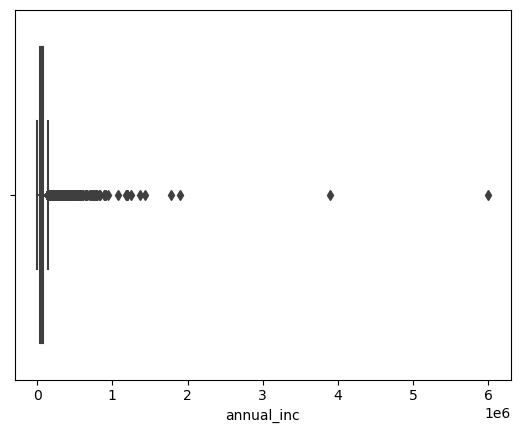

In [56]:
sns.boxplot(x=loan.annual_inc)
plt.show()

In [57]:
# Above plot is showing outliers in annual income column, analysing more
np.percentile(loan.annual_inc, 95)

140000.0

In [58]:
# Dropping columns having annual income more than 140000.0, as 95% data lies below this value
loan = loan[(loan.annual_inc<=140000)]

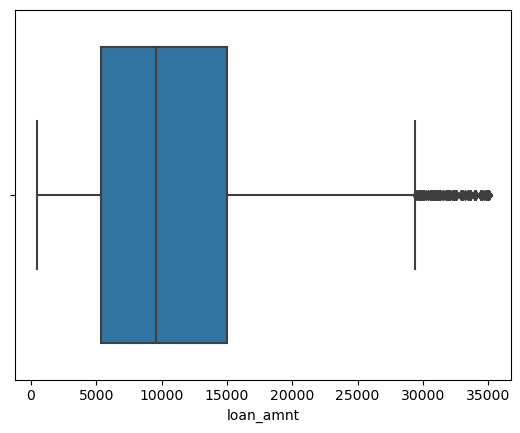

In [59]:
# loan_amnt: Loan Amount
sns.boxplot(x=loan.loan_amnt)
plt.show()

In [60]:
# Above plot is showing condensed values after upper fence, can't assume those as outlier
# Analysing more:
loan.loan_amnt.value_counts()

10000    2499
12000    2107
5000     1814
6000     1722
15000    1648
         ... 
19150       1
9725        1
18575       1
27700       1
700         1
Name: loan_amnt, Length: 849, dtype: int64

In [61]:
loan.loan_amnt.describe()

count    34810.000000
mean     10937.517236
std       7154.956276
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [62]:
np.percentile(loan.loan_amnt, 95)

25000.0

In [63]:
# Check for data having value greater than 25000
loan[(loan.loan_amnt>25000)].shape

(1182, 45)

There are 459 entries for max loan_amnt value, can't treat them as outliers

#### Derived Metrics

In [64]:
# Creating derived metrics: issue_year, issue_month 
# Reason: Need time frame of data for analysis
from datetime import datetime

loan_issue_date = loan["issue_d"].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan['issue_year'] = loan_issue_date.dt.year
loan['issue_month'] = loan_issue_date.dt.month

In [65]:
# Defaulter Analysis
loan.loan_status.describe()

count          34810
unique             3
top       Fully Paid
freq           28973
Name: loan_status, dtype: object

In [66]:
loan.loan_status.value_counts()

Fully Paid     28973
Charged Off     4849
Current          988
Name: loan_status, dtype: int64

In [67]:
# There are 3 unique values for loan_status, need to analyse for defaulter, 
# so creating Category column containg "Defaulter" and "Non-Defaulter" values 
loan["Category"] = loan.loan_status.apply(lambda x: "Defaulter" if x=="Charged Off" else "Non-Defaulter")

In [68]:
# For bivariate analysis, there will be requiremet to treat loan_status as numeric value 
# for that purpose: creating Defaulter column which will have entry 1 for Defaulter and 0 for Non-Defaulter
loan["Defaulter"] = loan.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)

#### Data Understanding

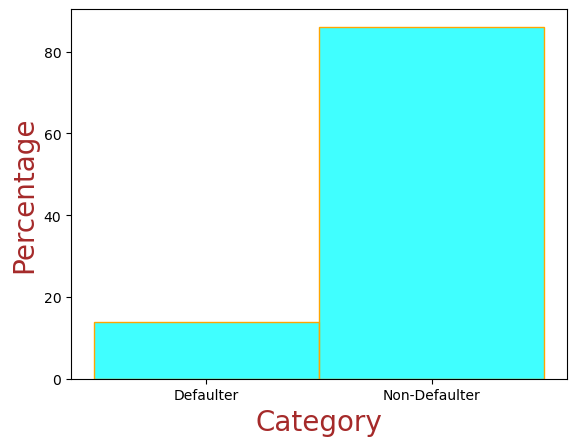

In [69]:
# Plot for Category percentage
sns.histplot(binwidth=1, x="Category", data=loan, stat="percent", multiple="dodge", color='cyan', edgecolor = 'Orange')
fontDict={"fontsize":20, "fontweight": 5, "color": "Brown"}
plt.xlabel("Category", fontdict=fontDict)
plt.ylabel("Percentage", fontdict=fontDict)
plt.show()

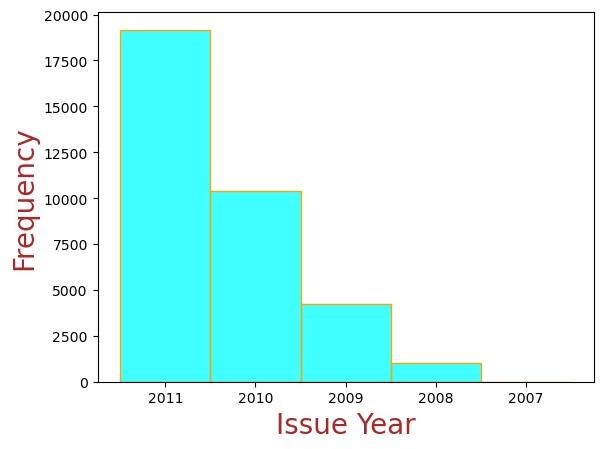

In [70]:
# Understanding time frame of loan data
sns.histplot(loan.issue_year.astype(str), edgecolor = 'Orange', color = 'cyan')
fontDict={"fontsize":20, "fontweight": 5, "color": "Brown"}
plt.xlabel("Issue Year", fontdict=fontDict)
plt.ylabel("Frequency", fontdict=fontDict)
plt.show()

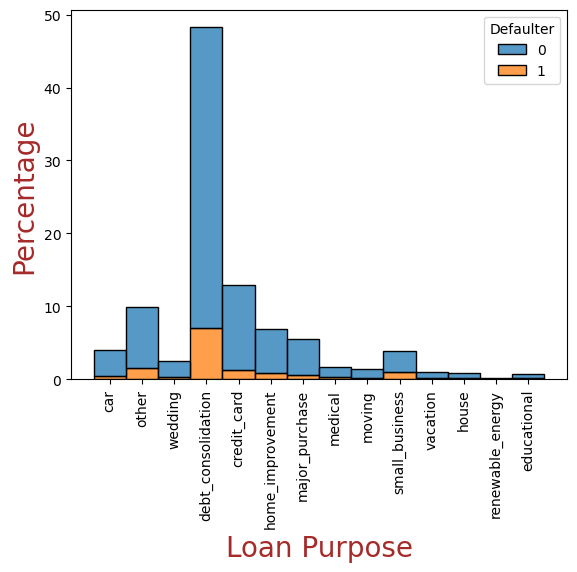

In [71]:
# Understanding customer loan purpose percentage of data
sns.histplot(x="purpose", data=loan, stat="percent", multiple="stack", hue='Defaulter')
fontDict={"fontsize":20, "fontweight": 5, "color": "Brown"}
plt.xlabel("Loan Purpose", fontdict=fontDict)
plt.ylabel("Percentage", fontdict=fontDict)
plt.xticks(rotation=90)
plt.show()

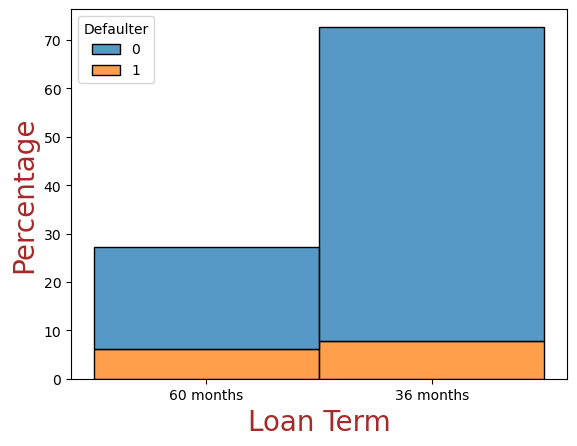

In [72]:
# Understanding loan term percentage of data
ax = sns.histplot(x=loan.term.astype(str), data=loan, hue='Defaulter', stat="percent", multiple="stack")
ax.set_xticklabels(["60 months", "36 months"])
fontDict={"fontsize":20, "fontweight": 5, "color": "Brown"}
plt.xlabel("Loan Term", fontdict=fontDict)
plt.ylabel("Percentage", fontdict=fontDict)
plt.show()

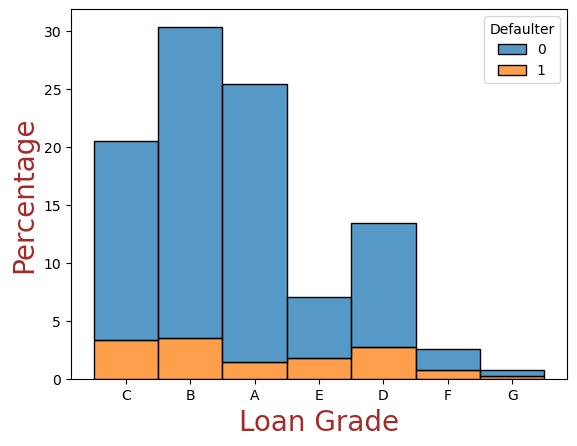

In [73]:
# grade: LC assigned loan grade, Understanding loan grade percentage of data
ax=sns.histplot(x="grade", data=loan, stat="percent",  multiple="stack", hue='Defaulter')
fontDict={"fontsize":20, "fontweight": 5, "color": "Brown"}
plt.xlabel("Loan Grade", fontdict=fontDict)
plt.ylabel("Percentage", fontdict=fontDict)
plt.show()

Data Understanding Conclusion:  <br/>
• Overall Default Rate of given loan data is 14% <br/>
• Timeframe of given loan data is “2007-2011”<br/>
• 73% of loans are approved for 36 months term<br/>
• There are different types of loan purpose given, in which 48% is of “Debt Consolidation” <br/>
• Number of loans is directly proportional to Customer Grade<br/>

#### Univariate Analysis

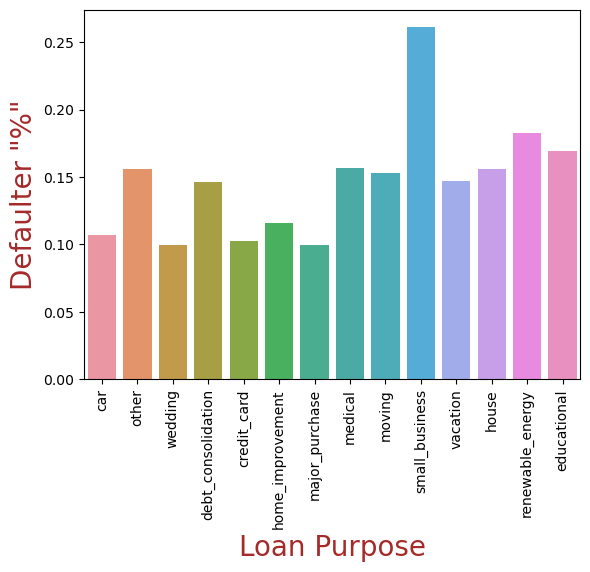

In [74]:
# Analysis of loan purpose with defaulters
sns.barplot( x="purpose", y="Defaulter", data=loan, errorbar=None)
plt.xlabel("Loan Purpose", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.xticks(rotation=90)
plt.show()

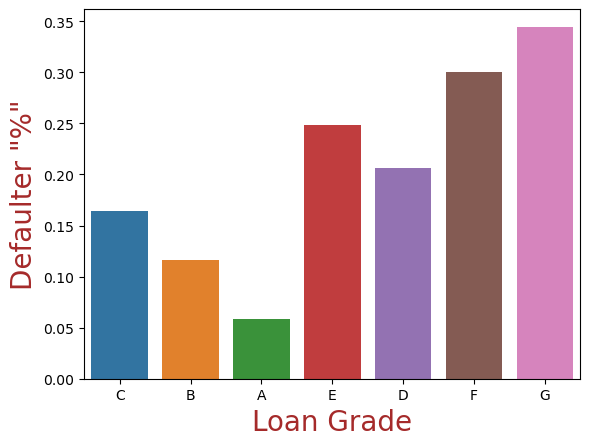

In [75]:
# Analysis of loan grade with defaulters
sns.barplot( x="grade", y="Defaulter", data=loan, errorbar=None)
plt.xlabel("Loan Grade", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.show()

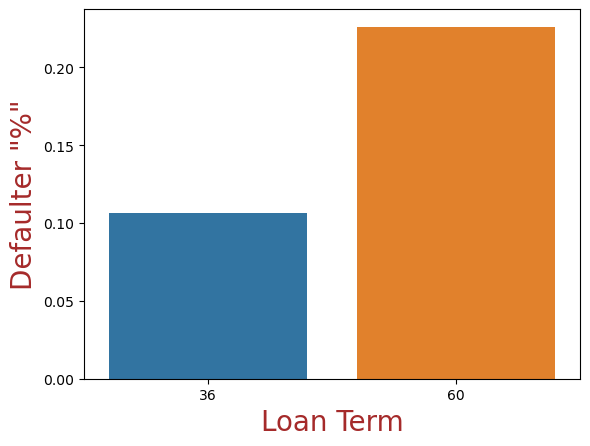

In [76]:
# Analysis of loan term with defaulters
sns.barplot( x="term", y="Defaulter", data=loan, errorbar=None)
plt.xlabel("Loan Term", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.show()

#### Segmented Univariate Analysis

In [77]:
# Interest Rate (int_rate) Analysis  
loan.int_rate.describe()

count    34810.000000
mean        12.030456
std          3.707354
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.400000
Name: int_rate, dtype: float64

In [78]:
pd.cut(loan['int_rate'], bins=5, precision=0)

1        (13.0, 17.0]
3        (13.0, 17.0]
4         (9.0, 13.0]
5          (5.0, 9.0]
6        (13.0, 17.0]
             ...     
39551     (9.0, 13.0]
39562     (9.0, 13.0]
39623     (9.0, 13.0]
39666     (9.0, 13.0]
39680     (9.0, 13.0]
Name: int_rate, Length: 34810, dtype: category
Categories (5, interval[float64, right]): [(5.0, 9.0] < (9.0, 13.0] < (13.0, 17.0] < (17.0, 21.0] < (21.0, 24.0]]

In [79]:
# Segmenting int_rate in 5 bins
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5, precision=0, labels=['5-9','9-13','13-17', '17-21', '21-24'])

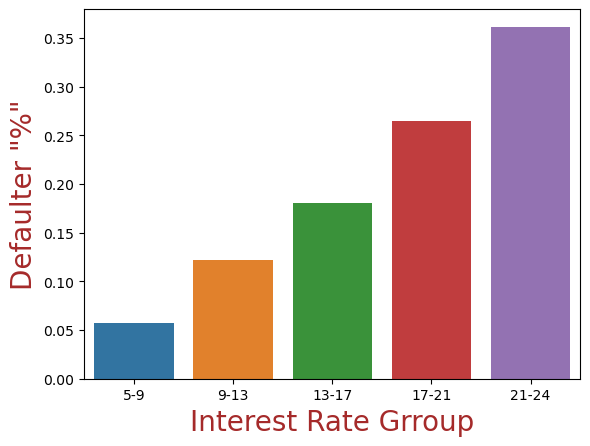

In [80]:
sns.barplot( x="int_rate_groups", y="Defaulter", data=loan, errorbar=None)
plt.xlabel("Interest Rate Grroup", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.show()

In [81]:
# Segmenting annual_inc into 5 bins
loan['annual_inc_groups']=pd.cut(loan['annual_inc'], bins=10, precision=0, 
                                labels=['3864-17600', '17600-31200', '31200-44800', '44800-58400','58400-72000', '72000-85600', '85600-99200', '99200-112800', '112800-126400', '126400-140000'])


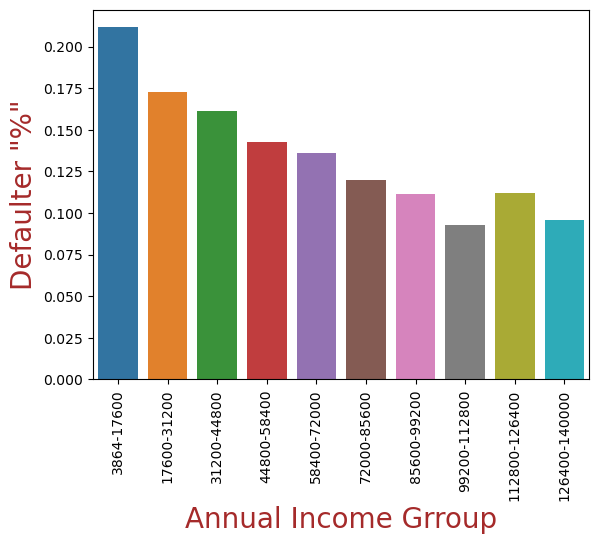

In [82]:
sns.barplot( x="annual_inc_groups", y="Defaulter", data=loan, errorbar=None)
plt.xlabel("Annual Income Grroup", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.xticks(rotation=90)
plt.show()

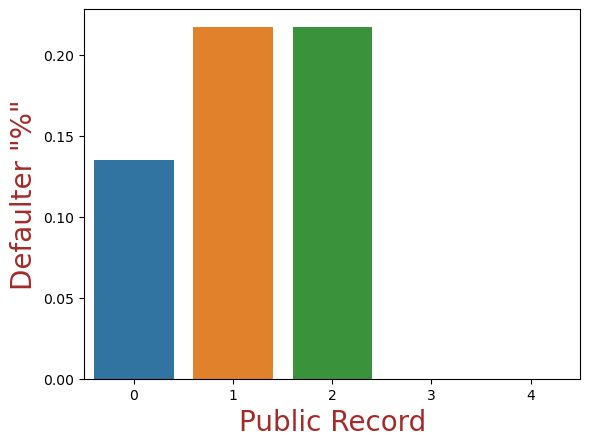

In [83]:
sns.barplot( x="pub_rec", y="Defaulter", data=loan, errorbar=None)
plt.xlabel("Public Record", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.show()

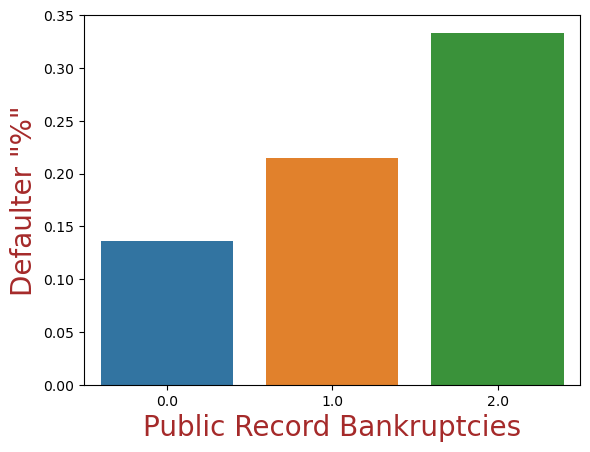

In [84]:
sns.barplot( x="pub_rec_bankruptcies", y="Defaulter", data=loan, errorbar=None)
plt.xlabel("Public Record Bankruptcies", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.show()

In [85]:
loan['dti_groups'] = pd.cut(loan['dti'], bins=5, precision=0,labels=['0-6','6-12','12-18', '18-24', '24-30'])

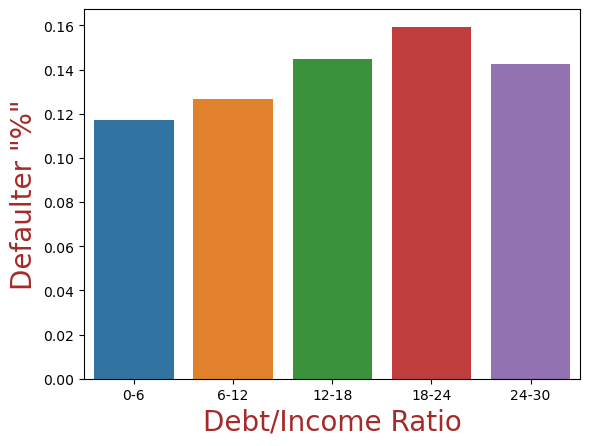

In [86]:
sns.barplot( x="dti_groups", y="Defaulter", data=loan, errorbar=None)
plt.xlabel("Debt/Income Ratio", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.show()

In [87]:
pd.cut(loan['loan_amnt'], bins=5, precision=0)

1           (466.0, 7400.0]
3         (7400.0, 14300.0]
4           (466.0, 7400.0]
5           (466.0, 7400.0]
6           (466.0, 7400.0]
                ...        
39551     (7400.0, 14300.0]
39562       (466.0, 7400.0]
39623     (7400.0, 14300.0]
39666    (14300.0, 21200.0]
39680       (466.0, 7400.0]
Name: loan_amnt, Length: 34810, dtype: category
Categories (5, interval[float64, right]): [(466.0, 7400.0] < (7400.0, 14300.0] < (14300.0, 21200.0] < (21200.0, 28100.0] < (28100.0, 35000.0]]

In [88]:
loan["loan_amnt_groups"] = pd.cut(loan['loan_amnt'], bins=5, precision=0, labels=['466-7400','7400-14300','14300-21200', '21200-28100', '28100-35000'])

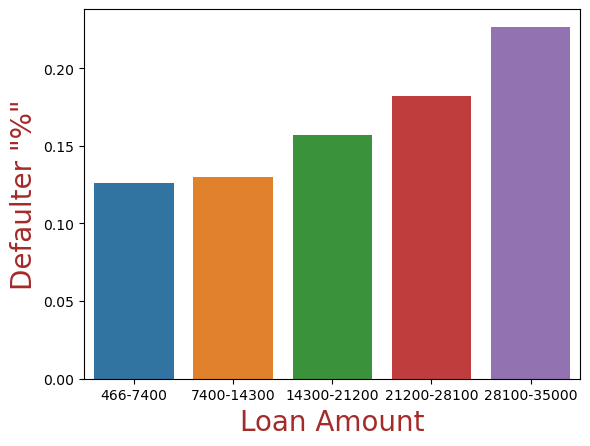

In [89]:
sns.barplot( x="loan_amnt_groups", y="Defaulter", data=loan, errorbar=None)
plt.xlabel("Loan Amount", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.show()

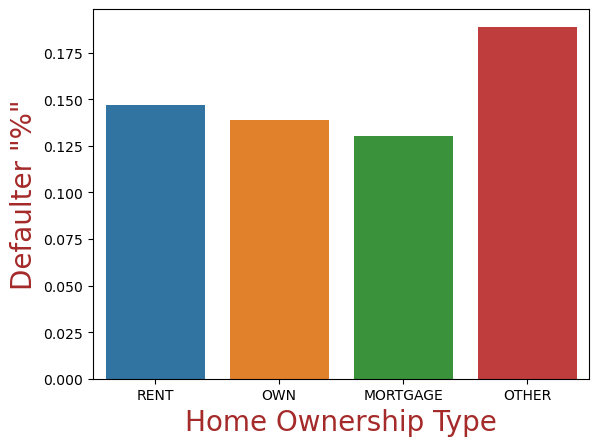

In [90]:
sns.barplot( x="home_ownership", y="Defaulter", data=loan, errorbar=None)
plt.xlabel("Home Ownership Type", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.show()

In [91]:
pd.cut(loan['revol_util'], bins=5, precision=0)

1         (-0.1, 20.0]
3         (20.0, 40.0]
4         (40.0, 60.0]
5         (20.0, 40.0]
6        (80.0, 100.0]
             ...      
39551    (80.0, 100.0]
39562     (60.0, 80.0]
39623     (60.0, 80.0]
39666     (20.0, 40.0]
39680     (60.0, 80.0]
Name: revol_util, Length: 34810, dtype: category
Categories (5, interval[float64, right]): [(-0.1, 20.0] < (20.0, 40.0] < (40.0, 60.0] < (60.0, 80.0] < (80.0, 100.0]]

In [92]:
loan['revol_util_groups'] = pd.cut(loan['revol_util'], bins=5, precision=0, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

In [93]:
loan.revol_util.describe()

count    34810.000000
mean        49.164514
std         28.109807
min          0.000000
25%         26.100000
50%         49.700000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

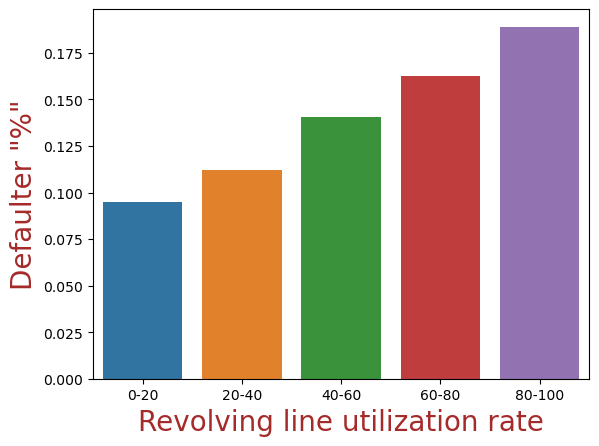

In [94]:
sns.barplot( x="revol_util_groups", y="Defaulter", data=loan, errorbar=None)
plt.xlabel("Revolving line utilization rate", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.show()

### Bivariate Analysis

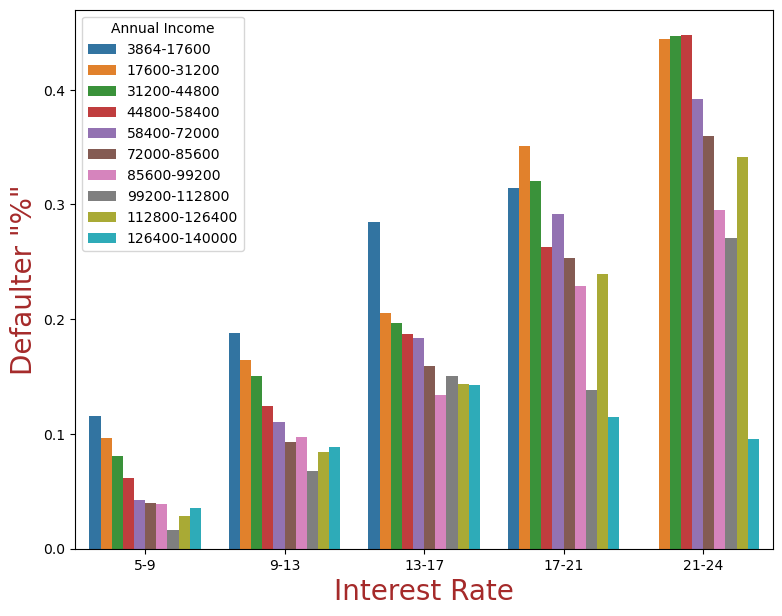

In [95]:
# Effect of Interest Rate and Annual Income on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="int_rate_groups", y="Defaulter", hue="annual_inc_groups", data=loan, errorbar=None)
plt.xlabel("Interest Rate", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Annual Income')
plt.show()

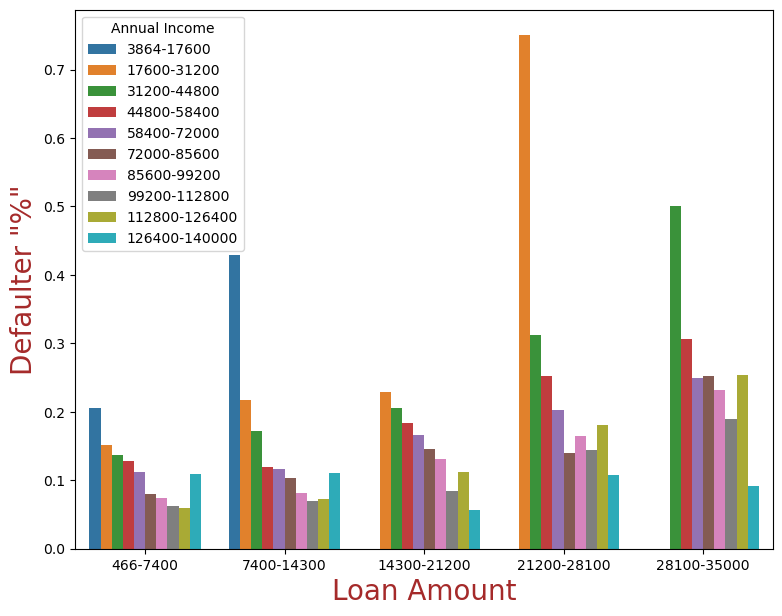

In [96]:
# Effect of Loan Amount and Annual Income on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="loan_amnt_groups", y="Defaulter", hue="annual_inc_groups", data=loan, errorbar=None)
plt.xlabel("Loan Amount", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Annual Income')
plt.show()

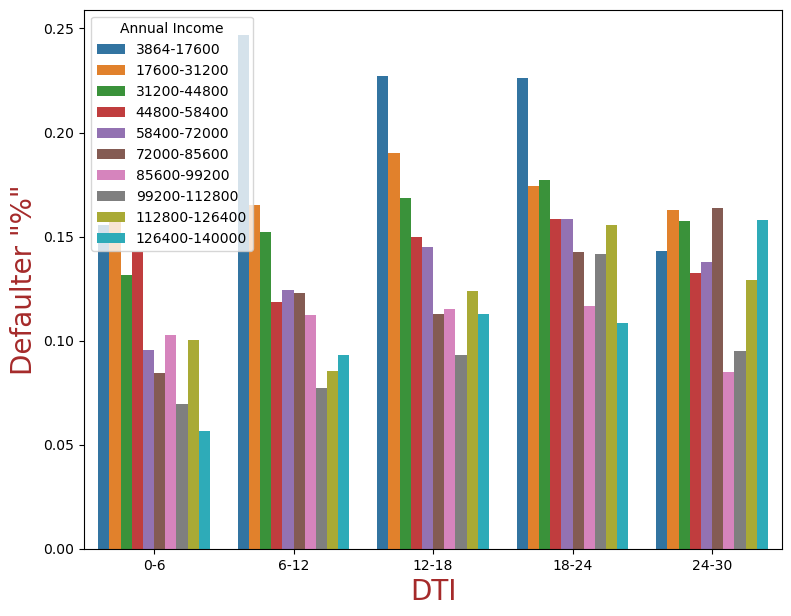

In [97]:
# Effect of Dti and Annual Income on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="dti_groups", y="Defaulter", hue="annual_inc_groups", data=loan, errorbar=None)
plt.xlabel("DTI", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Annual Income')
plt.show()

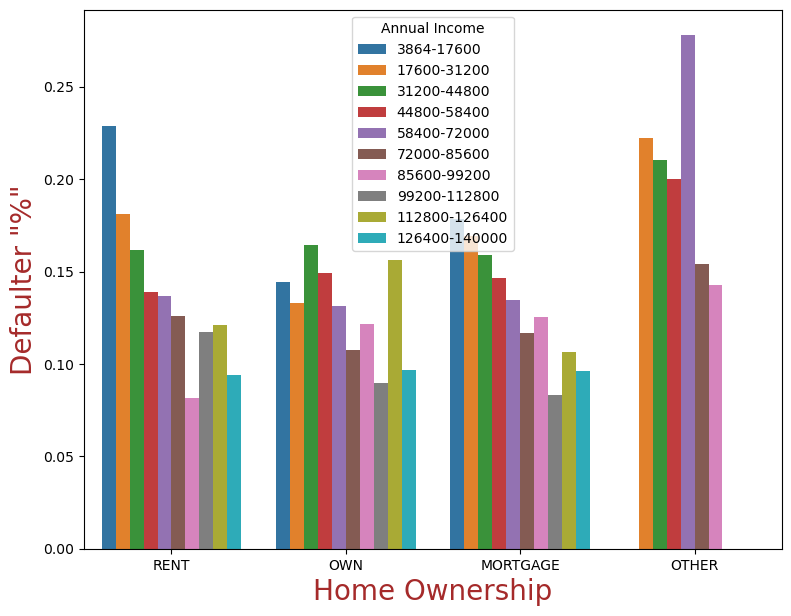

In [98]:
# Effect of Home Ownership and Annual Income on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="home_ownership", y="Defaulter", hue="annual_inc_groups", data=loan, errorbar=None)
plt.xlabel("Home Ownership", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Annual Income')
plt.show()

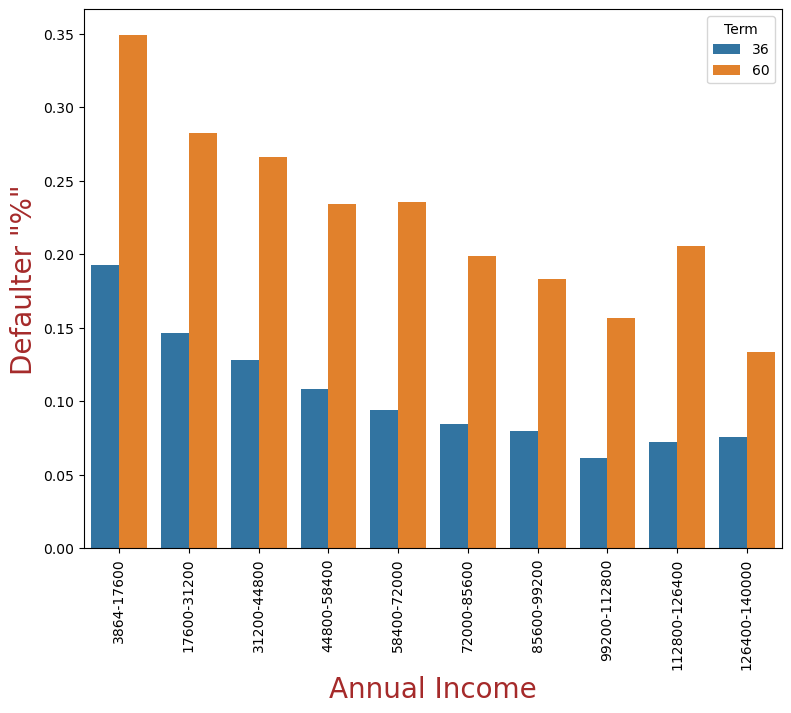

In [99]:
# Effect of Loan term and Annual Income on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="annual_inc_groups", y="Defaulter", hue="term", data=loan, errorbar=None)
plt.xlabel("Annual Income", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Term')
plt.xticks(rotation=90)
plt.show()

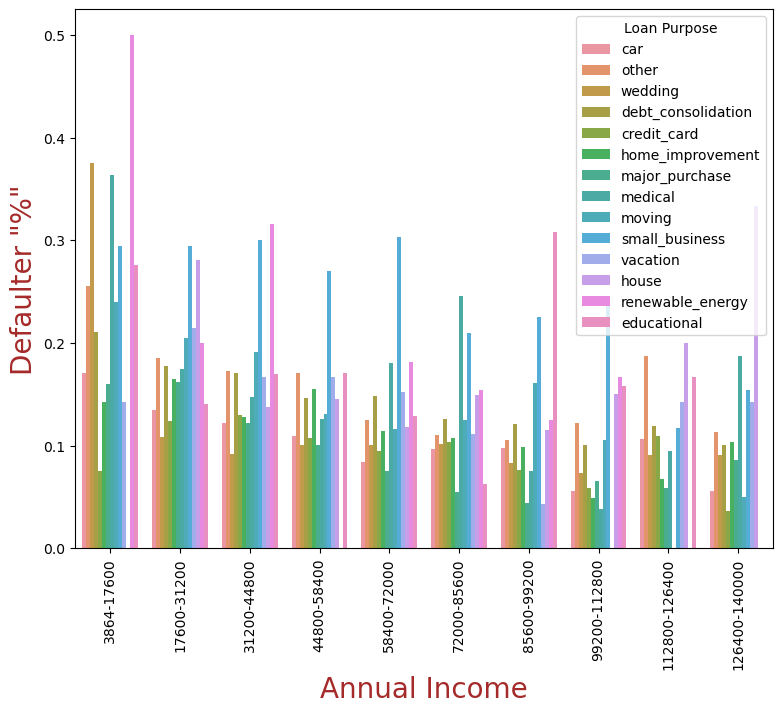

In [100]:
# Effect of Loan purpose and Annual Income on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="annual_inc_groups", y="Defaulter", hue="purpose", data=loan, errorbar=None)
plt.xlabel("Annual Income", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Loan Purpose')
plt.xticks(rotation=90)
plt.show()

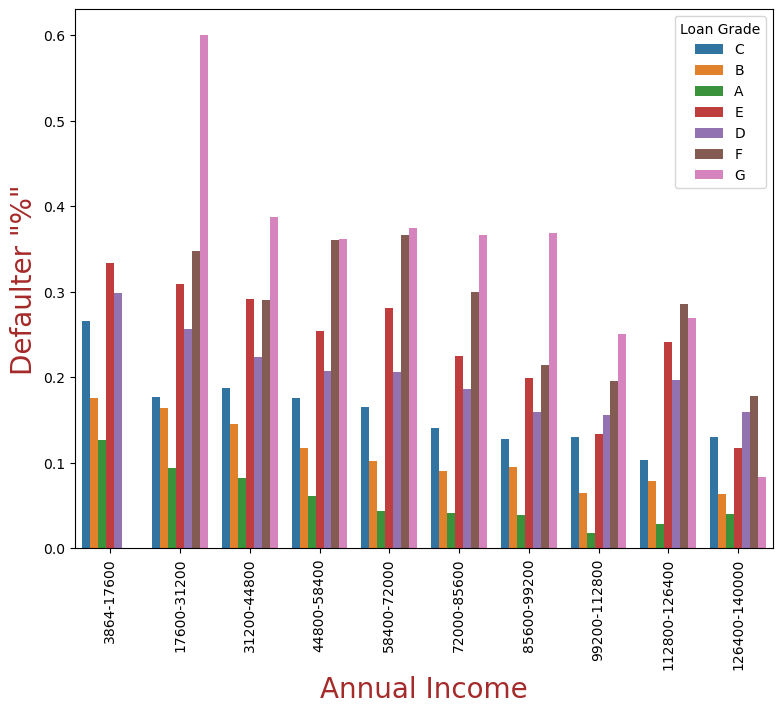

In [101]:
# Effect of Loan grade and Annual Income on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="annual_inc_groups", y="Defaulter", hue="grade", data=loan, errorbar=None)
plt.xlabel("Annual Income", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Loan Grade')
plt.xticks(rotation=90)
plt.show()

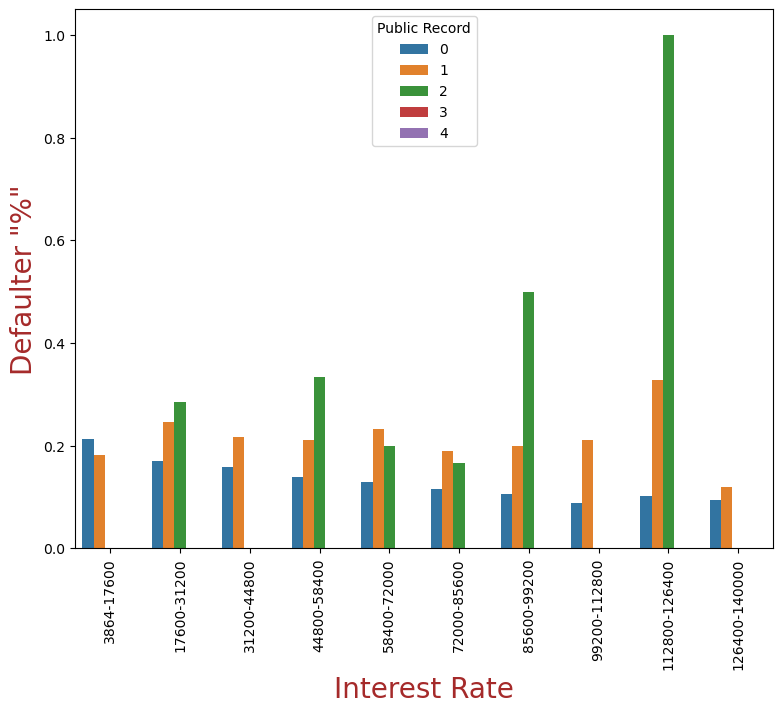

In [102]:
# Effect of Public Record and Annual Income on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="annual_inc_groups", y="Defaulter", hue="pub_rec", data=loan, errorbar=None)
plt.xlabel("Interest Rate", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Public Record')
plt.xticks(rotation=90)
plt.show()

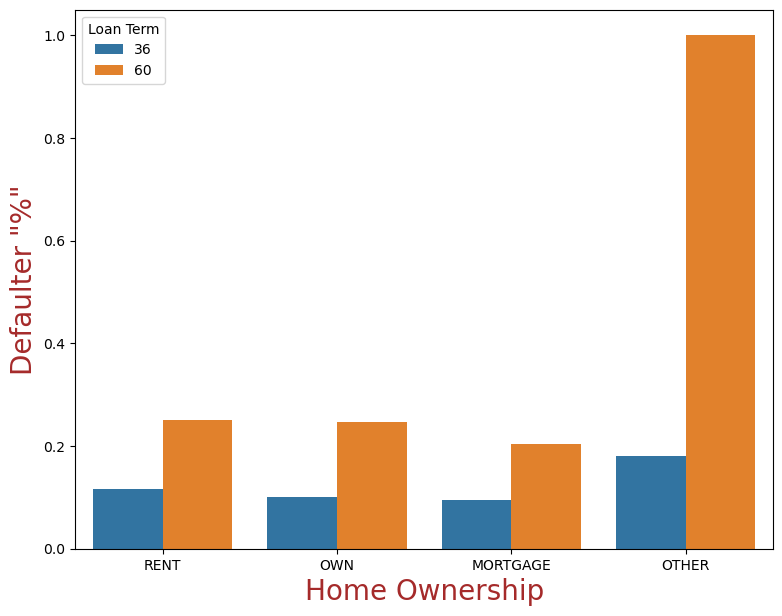

In [103]:
# Effect of Home Ownership and Loan Term on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="home_ownership", y="Defaulter", hue="term", data=loan, errorbar=None)
plt.xlabel("Home Ownership", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Loan Term')
plt.show()

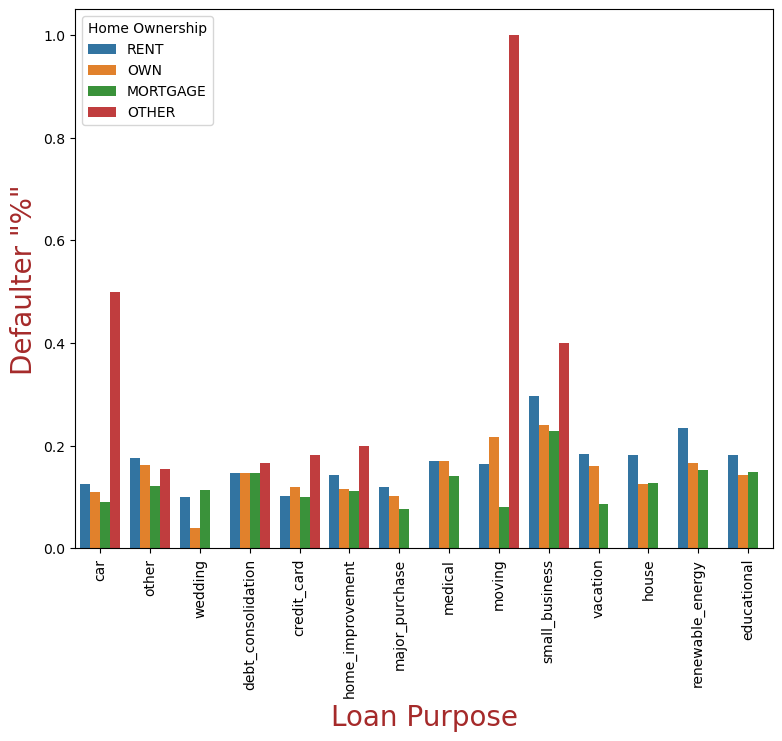

In [104]:
# Effect of Home Ownership and Loan Purpose on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="purpose", y="Defaulter", hue="home_ownership", data=loan, errorbar=None)
plt.xlabel("Loan Purpose", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Home Ownership')
plt.xticks(rotation=90)
plt.show()

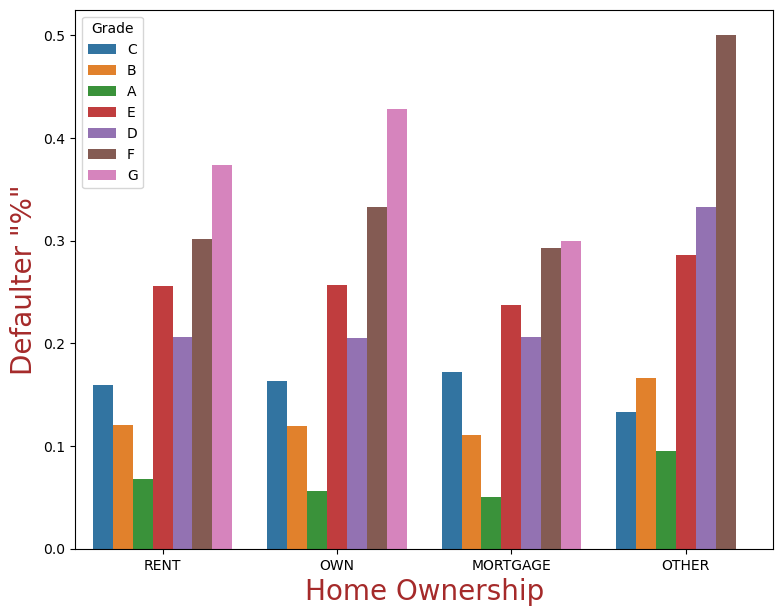

In [105]:
# Effect of Home Ownership and Customer Grade on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="home_ownership", y="Defaulter", hue="grade", data=loan, errorbar=None)
plt.xlabel("Home Ownership", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Grade')
plt.show()

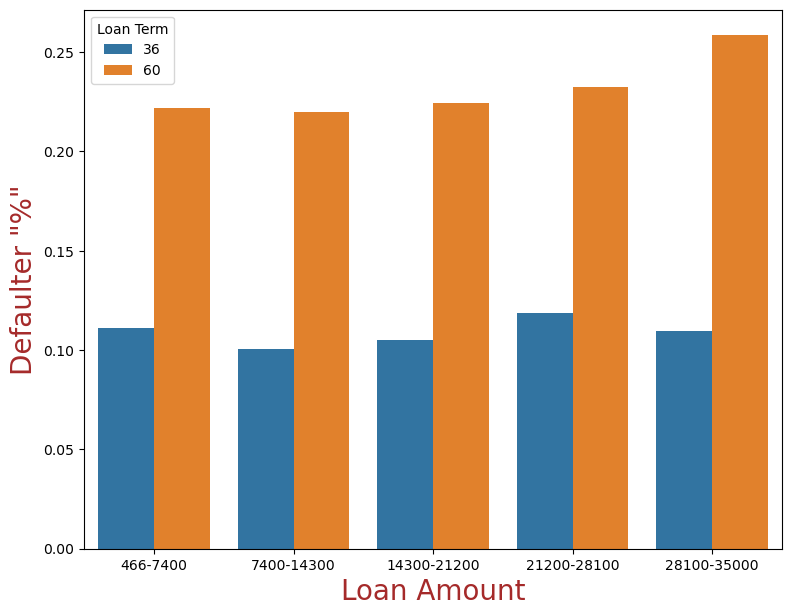

In [106]:
# Effect of Loan Amount and Term on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="loan_amnt_groups", y="Defaulter", hue="term", data=loan, errorbar=None)
plt.xlabel("Loan Amount", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Loan Term')
plt.show()

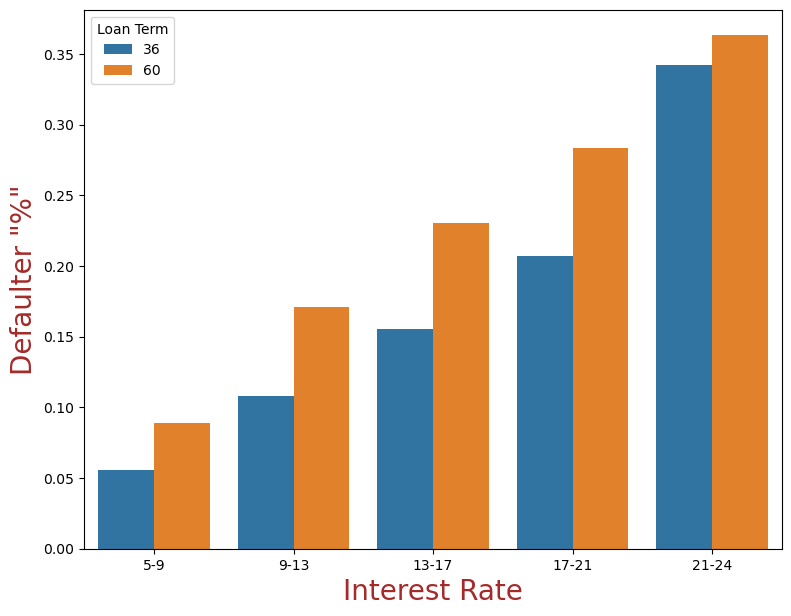

In [107]:
# Effect of Interest Rate and Term on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="int_rate_groups", y="Defaulter", hue="term", data=loan, errorbar=None)
plt.xlabel("Interest Rate", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Loan Term')
plt.show()

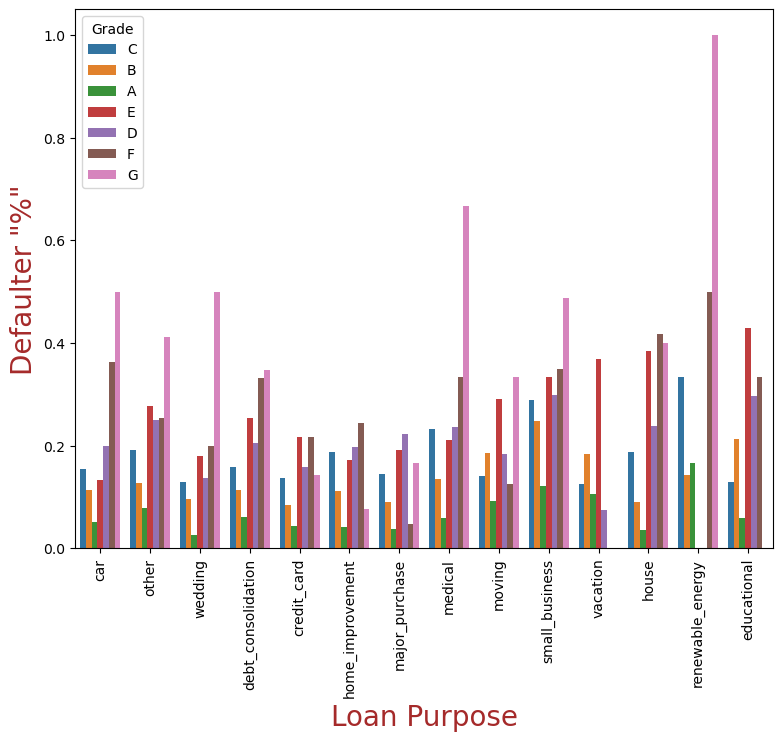

In [108]:
# Effect of Loan Purpose and Grade on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="purpose", y="Defaulter", hue="grade", data=loan, errorbar=None)
plt.xlabel("Loan Purpose", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Grade')
plt.xticks(rotation=90)
plt.show()

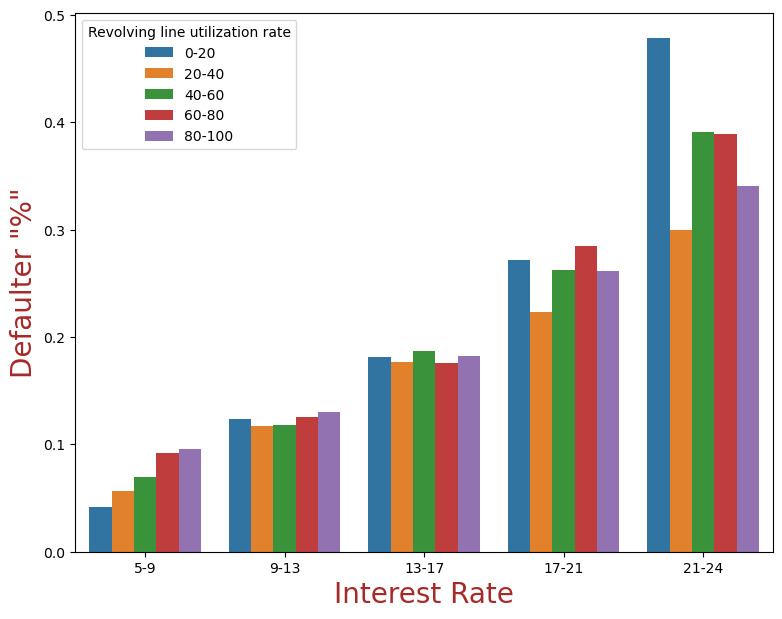

In [109]:
# Effect of Interest Rate and Term on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="int_rate_groups", y="Defaulter", hue="revol_util_groups", data=loan, errorbar=None)
plt.xlabel("Interest Rate", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Revolving line utilization rate')
plt.show()

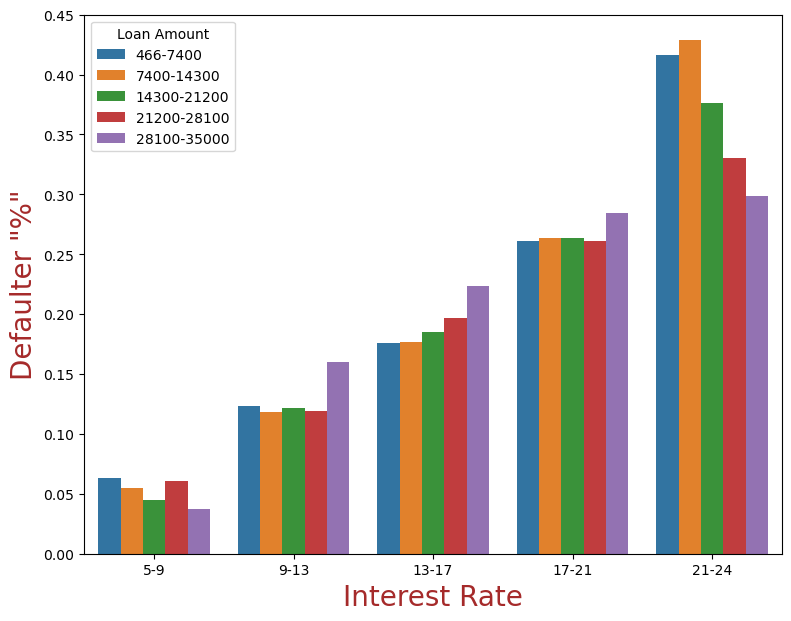

In [110]:
# Effect of Interest Rate and Loan Amount on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="int_rate_groups", y="Defaulter", hue="loan_amnt_groups", data=loan, errorbar=None)
plt.xlabel("Interest Rate", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Loan Amount')
plt.show()

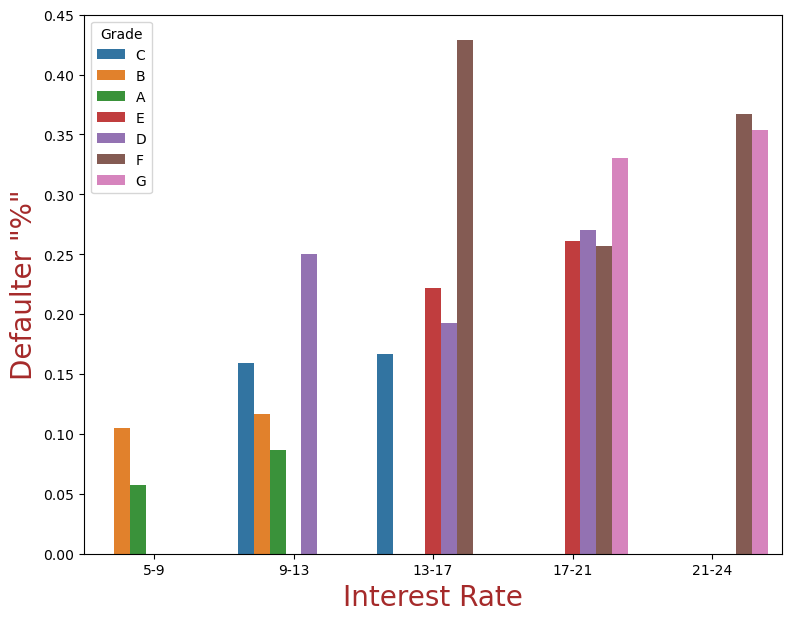

In [111]:
# Effect of Interest Rate and Grade on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="int_rate_groups", y="Defaulter", hue="grade", data=loan, errorbar=None)
plt.xlabel("Interest Rate", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Grade')
plt.show()

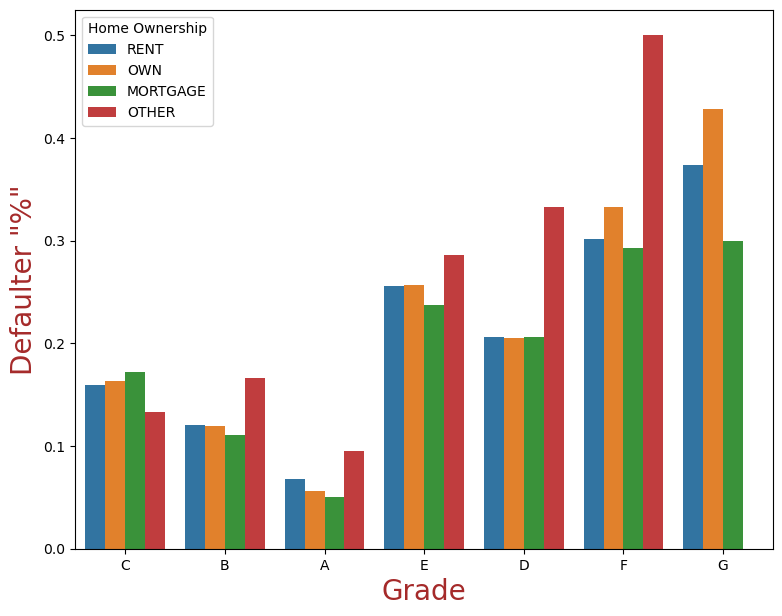

In [112]:
# Effect of Home Ownership and Grade on Defaulters percentage
plt.figure(figsize=(9,7))
sns.barplot(x="grade", y="Defaulter", hue="home_ownership", data=loan, errorbar=None)
plt.xlabel("Grade", fontdict=fontDict)
plt.ylabel('Defaulter "%"', fontdict=fontDict)
plt.legend(title='Home Ownership')
plt.show()

In [115]:
# creating grade_weight derived metric to understand heatmap
loan["grade_weight"] = loan.grade.apply(lambda x: int(ord(x)-64))
loan["grade_weight"].value_counts()

2    10560
1     8844
3     7141
4     4671
5     2451
6      879
7      264
Name: grade_weight, dtype: int64

<Axes: >

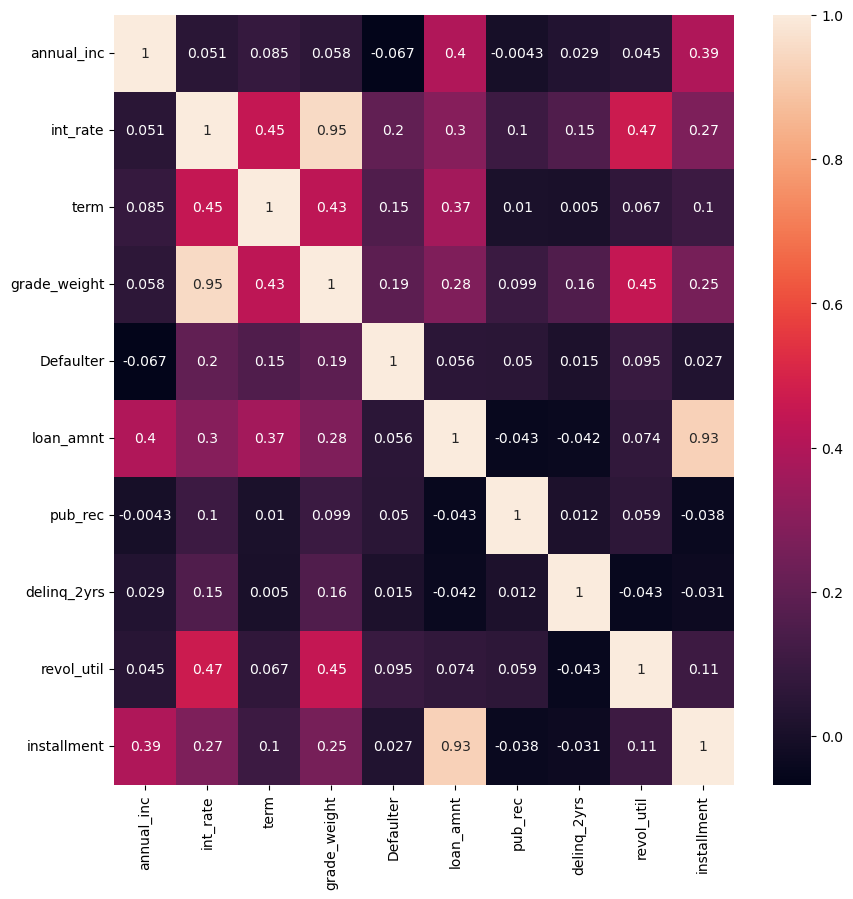

In [116]:
loan_segment_df = loan[['annual_inc', 'int_rate', 'term', 'grade_weight',  'Defaulter', 'loan_amnt',  'pub_rec', 'delinq_2yrs', 'revol_util', 'installment']]
corr = loan_segment_df.corr()


plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)